In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"] #解决中文乱码问题
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df_train = pd.read_csv('data_format1/train_format1.csv')
df_test = pd.read_csv('data_format1/test_format1.csv')
user_info = pd.read_csv('data_format1/user_info_format1.csv')

In [3]:
user_log = pd.read_csv('data_format1/user_log_format1.csv')

In [4]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [5]:
user_info.head(10)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0
5,272389,6.0,1.0
6,281071,4.0,0.0
7,139859,7.0,0.0
8,198411,5.0,1.0
9,67037,4.0,1.0


In [6]:
user_info['age_range'].replace(0.0,np.nan,inplace=True)
user_info['gender'].replace(2.0,np.nan,inplace=True)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  329039 non-null  float64
 2   gender     407308 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [7]:
user_info['age_range'].replace(np.nan,-1,inplace=True)
user_info['gender'].replace(np.nan,-1,inplace=True)

Text(0.5, 1.0, '用户年龄分布')

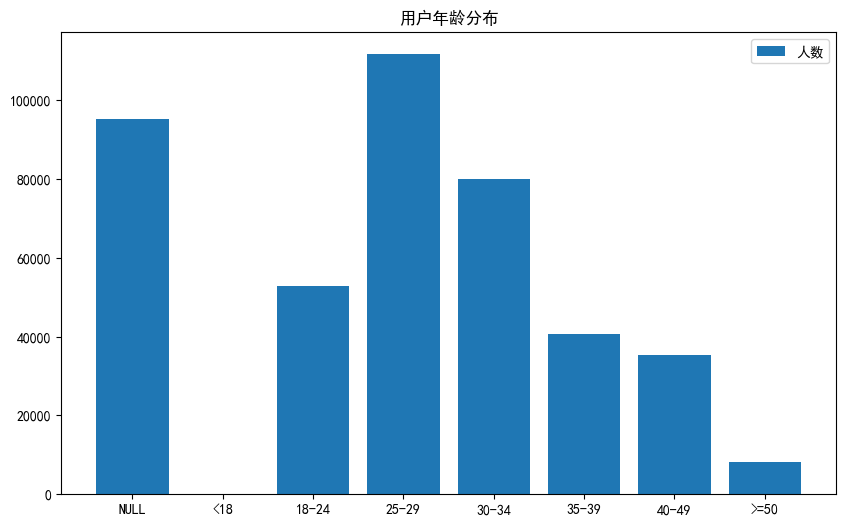

In [8]:
fig = plt.figure(figsize = (10, 6))
x = np.array(["NULL","<18","18-24","25-29","30-34","35-39","40-49",">=50"])
#<18岁为1；[18,24]为2； [25,29]为3； [30,34]为4；[35,39]为5；[40,49]为6； > = 50时为7和8
y = np.array([user_info[user_info['age_range'] == -1]['age_range'].count(),
             user_info[user_info['age_range'] == 1]['age_range'].count(),
             user_info[user_info['age_range'] == 2]['age_range'].count(),
             user_info[user_info['age_range'] == 3]['age_range'].count(),
             user_info[user_info['age_range'] == 4]['age_range'].count(),
             user_info[user_info['age_range'] == 5]['age_range'].count(),
             user_info[user_info['age_range'] == 6]['age_range'].count(),
             user_info[user_info['age_range'] == 7]['age_range'].count() + user_info[user_info['age_range'] == 8]['age_range'].count()])
plt.bar(x,y,label='人数')
plt.legend()
plt.title('用户年龄分布')

In [11]:
user_info['age_range'].replace(-1,np.nan,inplace=True)
user_info['gender'].replace(-1,np.nan,inplace=True)

In [13]:
user_log.isnull().sum(axis=0)

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [14]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [15]:
df_train.head(10)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0
5,362112,2618,0
6,34944,2051,0
7,231552,3828,1
8,231552,2124,0
9,232320,1168,0


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


<Axes: >

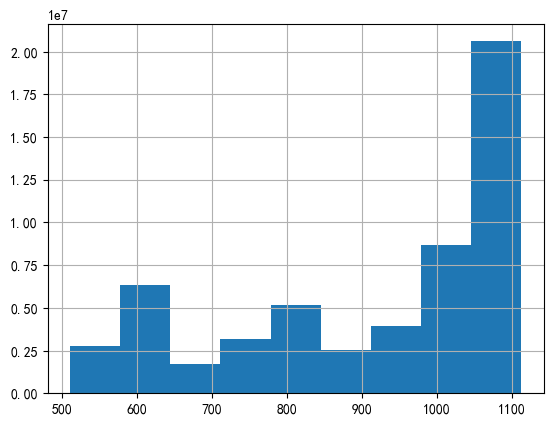

In [17]:
user_log['time_stamp'].hist(bins = 9)

In [18]:
df_train[df_train['label'] == 1]

,user_id,merchant_id,label
2,34176,4356,1
7,231552,3828,1
53,306816,1489,1
57,176256,3323,1
59,307584,1340,1
...,...,...,...
260747,208511,2592,1
260793,87935,1964,1
260794,87935,3734,1
260799,350591,4394,1


In [19]:
user_log[(user_log['user_id'] == 34176) & (user_log['seller_id'] == 3906)]

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
35905644,34176,757713,821,3906,6268.0,1110,0
35905646,34176,757713,821,3906,6268.0,1110,0
35905672,34176,757713,821,3906,6268.0,1110,0
35905696,34176,718096,1142,3906,6268.0,1031,3
35905720,34176,757713,821,3906,6268.0,1031,3
35905791,34176,613698,821,3906,6268.0,1021,0
35905804,34176,757713,821,3906,6268.0,1108,0
35905824,34176,757713,821,3906,6268.0,1029,0
35905830,34176,1093165,1397,3906,6268.0,1027,0
35905831,34176,898580,662,3906,6268.0,1027,0


In [20]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [21]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [22]:
# 用户的年龄(age_range)
# 用户的性别(gender)
# 某用户在该商家日志的总条数(total_logs)
# 用户浏览的商品的数目，就是浏览了多少个商品(unique_item_ids)
# 浏览的商品的种类的数目，就是浏览了多少种商品(categories)
# 用户浏览的天数(browse_days)
# 用户单击的次数(one_clicks)
# 用户添加购物车的次数(shopping_carts)
# 用户购买的次数(purchase_times)
# 用户收藏的次数(favourite_times)
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


#age_range,gender特征添加

In [23]:
df_train = pd.merge(df_train,user_info,on="user_id",how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,NaN,0.0


total_logs特征添加

In [24]:
total_logs_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]

In [25]:
total_logs_temp.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1
5,1,2245,5
6,1,4026,5
7,1,4177,1
8,1,4335,1
9,2,420,26


In [26]:
total_logs_temp.rename(columns={"seller_id":"merchant_id","item_id":"total_logs"},inplace=True)
total_logs_temp.head()

,user_id,merchant_id,total_logs
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1


In [27]:
total_logs_temp.rename(columns={"seller_id":"merchant_id","item_id":"total_logs"},inplace=True)
total_logs_temp.head()

,user_id,merchant_id,total_logs
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1


In [28]:
df_train = pd.merge(df_train,total_logs_temp,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs
0,34176,3906,0,6.0,0.0,39
1,34176,121,0,6.0,0.0,14
2,34176,4356,1,6.0,0.0,18
3,34176,2217,0,6.0,0.0,2
4,230784,4818,0,NaN,0.0,8


unique_item_ids特征添加

In [29]:
unique_item_ids_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["item_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]

In [30]:
unique_item_ids_temp.head(10)

,user_id,seller_id,item_id
0,1,471,638653
1,1,739,556107
2,1,925,504149
3,1,1019,1110495
4,1,1156,896183
5,1,2245,181459
6,1,2245,452837
7,1,2245,543397
8,1,2245,779078
9,1,4026,112203


In [31]:
unique_item_ids_temp1 = unique_item_ids_temp.groupby([unique_item_ids_temp["user_id"],unique_item_ids_temp["seller_id"]]).count().reset_index()

In [32]:
unique_item_ids_temp1.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [33]:
unique_item_ids_temp1.rename(columns={"seller_id":"merchant_id","item_id":"unique_item_ids"},inplace=True)

In [34]:
unique_item_ids_temp1.head(10)

,user_id,merchant_id,unique_item_ids
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [35]:
df_train = pd.merge(df_train,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids
0,34176,3906,0,6.0,0.0,39,20
1,34176,121,0,6.0,0.0,14,1
2,34176,4356,1,6.0,0.0,18,2
3,34176,2217,0,6.0,0.0,2,1
4,230784,4818,0,NaN,0.0,8,1


categories特征构建

In [36]:
categories_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["cat_id"]]).count().reset_index()[["user_id","seller_id","cat_id"]]

In [37]:
categories_temp.head(20)

,user_id,seller_id,cat_id
0,1,471,389
1,1,739,1252
2,1,925,1023
3,1,1019,992
4,1,1156,1256
5,1,2245,276
6,1,4026,1252
7,1,4177,1252
8,1,4335,389
9,2,420,602


In [38]:
categories_temp1 = categories_temp.groupby([categories_temp["user_id"],categories_temp["seller_id"]]).count().reset_index()
categories_temp1.head(10)

,user_id,seller_id,cat_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [39]:
categories_temp1.rename(columns={"seller_id":"merchant_id","cat_id":"categories"},inplace=True)
categories_temp1.head(10)

,user_id,merchant_id,categories
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [40]:
df_train = pd.merge(df_train,categories_temp1,on=["user_id","merchant_id"],how="left")

In [41]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories
0,34176,3906,0,6.0,0.0,39,20,6
1,34176,121,0,6.0,0.0,14,1,1
2,34176,4356,1,6.0,0.0,18,2,1
3,34176,2217,0,6.0,0.0,2,1,1
4,230784,4818,0,NaN,0.0,8,1,1
5,362112,2618,0,4.0,1.0,1,1,1
6,34944,2051,0,5.0,0.0,3,2,1
7,231552,3828,1,5.0,0.0,83,48,15
8,231552,2124,0,5.0,0.0,7,4,1
9,232320,1168,0,4.0,1.0,4,1,1


browse_days特征构建

In [42]:
browse_days_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["time_stamp"]]).count().reset_index()[["user_id","seller_id","time_stamp"]]

In [43]:
browse_days_temp.head(10)

,user_id,seller_id,time_stamp
0,1,471,1111
1,1,739,1018
2,1,925,1011
3,1,1019,1111
4,1,1156,1111
5,1,2245,1009
6,1,4026,1018
7,1,4026,1021
8,1,4177,1018
9,1,4335,1111


In [44]:
browse_days_temp1 = browse_days_temp.groupby([browse_days_temp["user_id"],browse_days_temp["seller_id"]]).count().reset_index()
browse_days_temp1.head(10)

,user_id,seller_id,time_stamp
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [45]:
browse_days_temp1.rename(columns={"seller_id":"merchant_id","time_stamp":"browse_days"},inplace=True)
browse_days_temp1.head(10)

,user_id,merchant_id,browse_days
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [46]:
df_train = pd.merge(df_train,browse_days_temp1,on=["user_id","merchant_id"],how="left")

In [47]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days
0,34176,3906,0,6.0,0.0,39,20,6,9
1,34176,121,0,6.0,0.0,14,1,1,3
2,34176,4356,1,6.0,0.0,18,2,1,2
3,34176,2217,0,6.0,0.0,2,1,1,1
4,230784,4818,0,NaN,0.0,8,1,1,3
5,362112,2618,0,4.0,1.0,1,1,1,1
6,34944,2051,0,5.0,0.0,3,2,1,1
7,231552,3828,1,5.0,0.0,83,48,15,3
8,231552,2124,0,5.0,0.0,7,4,1,1
9,232320,1168,0,4.0,1.0,4,1,1,2


one_clicks、shopping_carts、purchase_times、favourite_times特征构建

In [48]:
one_clicks_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["action_type"]]).count().reset_index()[["user_id","seller_id","action_type","item_id"]]
one_clicks_temp.head(10)

,user_id,seller_id,action_type,item_id
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [49]:
one_clicks_temp.rename(columns={"seller_id":"merchant_id","item_id":"times"},inplace=True)
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [50]:
one_clicks_temp["one_clicks"] = one_clicks_temp["action_type"] == 0
one_clicks_temp["one_clicks"] = one_clicks_temp["one_clicks"] * one_clicks_temp["times"]
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks
0,1,471,0,1,1
1,1,739,0,1,1
2,1,925,0,3,3
3,1,925,2,1,0
4,1,1019,0,10,10
5,1,1019,2,4,0
6,1,1156,0,1,1
7,1,2245,0,5,5
8,1,4026,0,4,4
9,1,4026,2,1,0


In [51]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["action_type"] == 1
one_clicks_temp["shopping_carts"] = one_clicks_temp["shopping_carts"] * one_clicks_temp["times"]
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts
0,1,471,0,1,1,0
1,1,739,0,1,1,0
2,1,925,0,3,3,0
3,1,925,2,1,0,0
4,1,1019,0,10,10,0
5,1,1019,2,4,0,0
6,1,1156,0,1,1,0
7,1,2245,0,5,5,0
8,1,4026,0,4,4,0
9,1,4026,2,1,0,0


In [52]:
one_clicks_temp["purchase_times"] = one_clicks_temp["action_type"] == 2
one_clicks_temp["purchase_times"] = one_clicks_temp["purchase_times"] * one_clicks_temp["times"]
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times
0,1,471,0,1,1,0,0
1,1,739,0,1,1,0,0
2,1,925,0,3,3,0,0
3,1,925,2,1,0,0,1
4,1,1019,0,10,10,0,0
5,1,1019,2,4,0,0,4
6,1,1156,0,1,1,0,0
7,1,2245,0,5,5,0,0
8,1,4026,0,4,4,0,0
9,1,4026,2,1,0,0,1


In [53]:
one_clicks_temp["favourite_times"] = one_clicks_temp["action_type"] == 3
one_clicks_temp["favourite_times"] = one_clicks_temp["favourite_times"] * one_clicks_temp["times"]
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0
5,1,1019,2,4,0,0,4,0
6,1,1156,0,1,1,0,0,0
7,1,2245,0,5,5,0,0,0
8,1,4026,0,4,4,0,0,0
9,1,4026,2,1,0,0,1,0


In [54]:
four_features = one_clicks_temp.groupby([one_clicks_temp["user_id"],one_clicks_temp["merchant_id"]]).sum().reset_index()
four_features.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,2,4,3,0,1,0
3,1,1019,2,14,10,0,4,0
4,1,1156,0,1,1,0,0,0
5,1,2245,0,5,5,0,0,0
6,1,4026,2,5,4,0,1,0
7,1,4177,0,1,1,0,0,0
8,1,4335,0,1,1,0,0,0
9,2,420,2,26,23,0,3,0


In [55]:
four_features = four_features.drop(["action_type","times"], axis=1)
df_train = pd.merge(df_train,four_features,on=["user_id","merchant_id"],how="left")
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,34176,3906,0,6.0,0.0,39,20,6,9,36,0,1,2
1,34176,121,0,6.0,0.0,14,1,1,3,13,0,1,0
2,34176,4356,1,6.0,0.0,18,2,1,2,12,0,6,0
3,34176,2217,0,6.0,0.0,2,1,1,1,1,0,1,0
4,230784,4818,0,NaN,0.0,8,1,1,3,7,0,1,0
5,362112,2618,0,4.0,1.0,1,1,1,1,0,0,1,0
6,34944,2051,0,5.0,0.0,3,2,1,1,2,0,1,0
7,231552,3828,1,5.0,0.0,83,48,15,3,78,0,5,0
8,231552,2124,0,5.0,0.0,7,4,1,1,6,0,1,0
9,232320,1168,0,4.0,1.0,4,1,1,2,2,0,1,1


建立好的特征的缺失值处理

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        203802 non-null  float64
 4   gender           250170 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 25.9 MB


In [57]:
df_train.isnull().sum(axis=0)

user_id                0
merchant_id            0
label                  0
age_range          57062
gender             10694
total_logs             0
unique_item_ids        0
categories             0
browse_days            0
one_clicks             0
shopping_carts         0
purchase_times         0
favourite_times        0
dtype: int64

In [58]:
df_train = df_train.fillna(method='ffill')
# 缺失值向前填充
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        260864 non-null  float64
 4   gender           260864 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 25.9 MB


['user_id', 'merchant_id', 'label', 'age_range', 'gender', 'total_logs', 'unique_item_ids', 'categories', 'browse_days', 'one_clicks', 'shopping_carts', 'purchase_times', 'favourite_times']


Text(0, 0.5, '用户数')

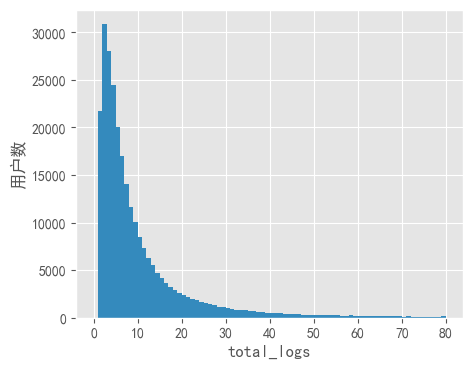

In [62]:
colnm = df_train.columns.tolist()
print(colnm)
plt.figure(figsize = (5, 4))
color = sns.color_palette()

df_train[colnm[5]].hist(range=[0,80],bins = 80,color = color[1])
plt.xlabel(colnm[5],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

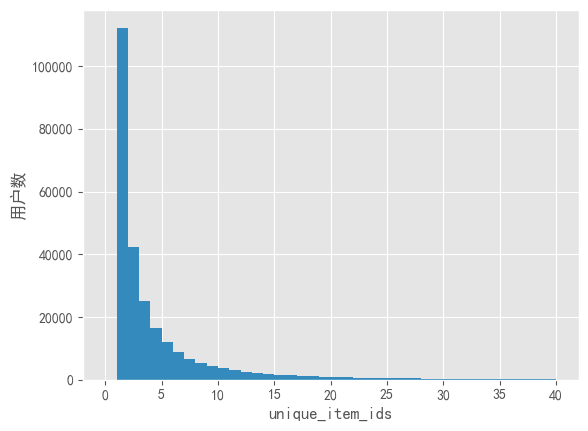

In [63]:
df_train[colnm[6]].hist(range=[0,40],bins = 40,color = color[1])
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

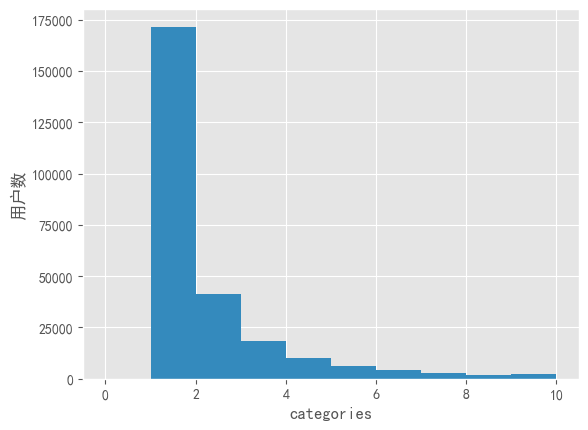

In [64]:
df_train[colnm[7]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[7],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

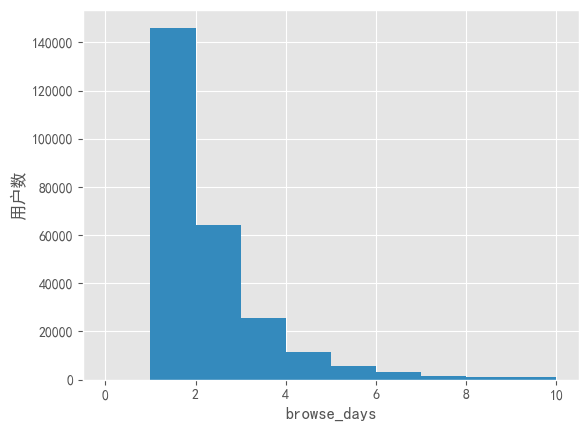

In [65]:
df_train[colnm[8]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[8],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户单击次数统计')

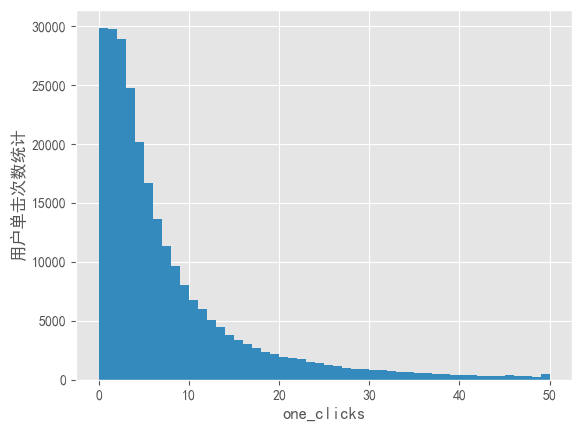

In [66]:
df_train[colnm[9]].hist(range=[0,50],bins = 50,color = color[1])
plt.xlabel(colnm[9],fontsize = 12)
plt.ylabel('用户单击次数统计')

Text(0, 0.5, '用户数')

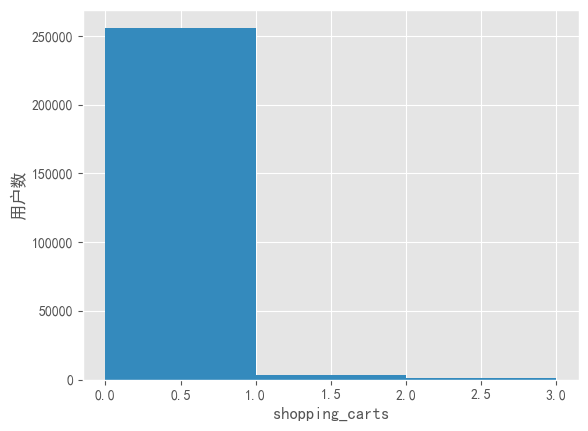

In [67]:
df_train[colnm[10]].hist(range=[0,3],bins = 3,color = color[1])
plt.xlabel(colnm[10],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

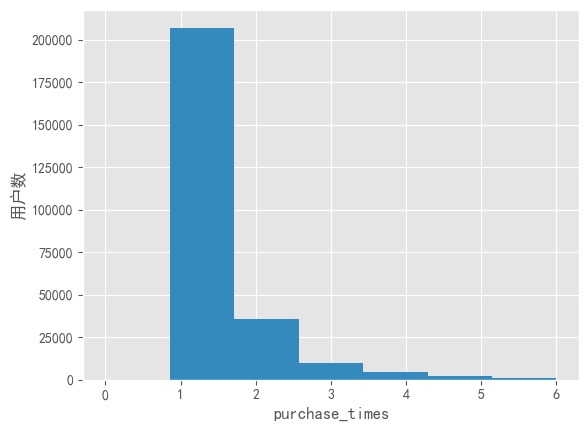

In [68]:
df_train[colnm[11]].hist(range=[0,6],bins = 7,color = color[1])
plt.xlabel(colnm[11],fontsize = 12)
plt.ylabel("用户数")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20464\3103668835.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(mcorr, dtype=np.bool)


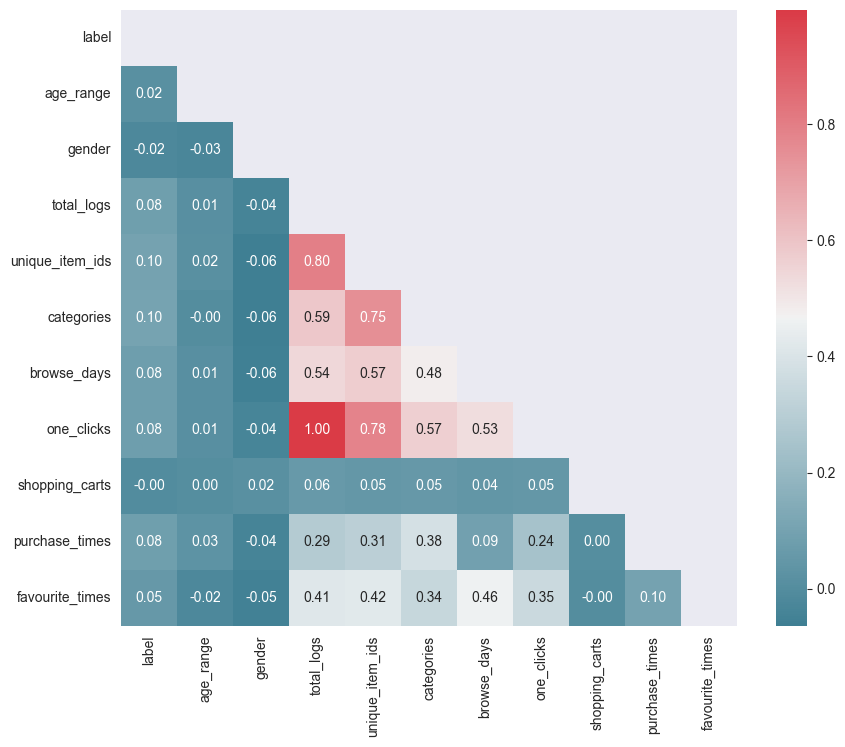

In [69]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df_train.columns.tolist()[2:13]
mcorr = df_train[colnm].corr()
# np.zero_like的意思就是生成一个和你所给数组a相同shape的全0数组。
mask = np.zeros_like(mcorr, dtype=np.bool)
# np.triu_indices_from()返回方阵的上三角矩阵的索引
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True,fmt='0.2f')
# 相关性好像不大，可是日志里确实也没啥可以用的其他特征了啊

模型构建

In [70]:
Y = df_train['label']
X = df_train.drop(['user_id','merchant_id','label'],axis = 1)
X.head(10)

,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,6.0,0.0,39,20,6,9,36,0,1,2
1,6.0,0.0,14,1,1,3,13,0,1,0
2,6.0,0.0,18,2,1,2,12,0,6,0
3,6.0,0.0,2,1,1,1,1,0,1,0
4,6.0,0.0,8,1,1,3,7,0,1,0
5,4.0,1.0,1,1,1,1,0,0,1,0
6,5.0,0.0,3,2,1,1,2,0,1,0
7,5.0,0.0,83,48,15,3,78,0,5,0
8,5.0,0.0,7,4,1,1,6,0,1,0
9,4.0,1.0,4,1,1,2,2,0,1,1


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 10)

In [72]:
Logit = LogisticRegression(solver='liblinear')
Logit.fit(X_train, y_train)
Predict = Logit.predict(X_test)
Predict_proba = Logit.predict_proba(X_test)
print(Predict[0:20])
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
Score

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.79596289 0.20403711]
 [0.95828112 0.04171888]
 [0.95192775 0.04807225]
 ...
 [0.94051946 0.05948054]
 [0.95677726 0.04322274]
 [0.93242835 0.06757165]]


0.9382053483807654

In [73]:
#初始化逻辑回归算法
LogRegAlg=LogisticRegression(random_state=1,solver='liblinear')
re = LogRegAlg.fit(X,Y)
#使用sklearn库里面的交叉验证函数获取预测准确率分数
scores = model_selection.cross_val_score(LogRegAlg,X,Y,cv=3)
#使用交叉验证分数的平均值作为最终的准确率
print("准确率为: ",scores.mean())

准确率为:  0.9386998592077297


决策树

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0) 
tree.fit(X_train, y_train)
Predict_proba = tree.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

[[0.89760368 0.10239632]
 [0.95837129 0.04162871]
 [0.95837129 0.04162871]
 ...
 [0.91089364 0.08910636]
 [0.95837129 0.04162871]
 [0.93376113 0.06623887]]
Accuracy on training set: 0.939
Accuracy on test set: 0.938


<BarContainer object of 10 artists>

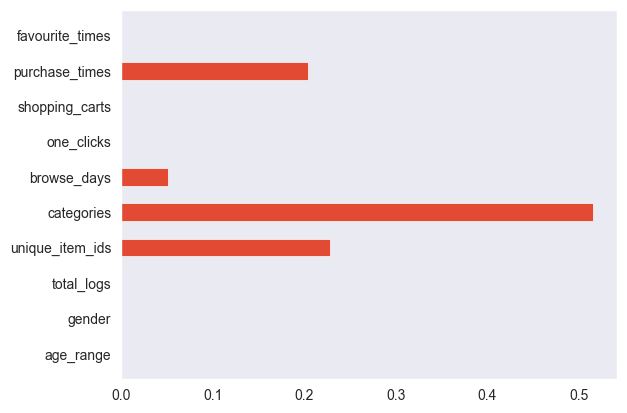

In [77]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0","1"], feature_names=X.columns.tolist(), impurity=False, filled=True)
import graphviz
with open("tree.dot") as f: 
    dot_graph = f.read() 
graphviz.Source(dot_graph)
plt.barh(X.columns.tolist(),height=0.5,width=tree.feature_importances_,align="center")

随机森林

[[0.8        0.2       ]
 [0.95573603 0.04426397]
 [0.95407861 0.04592139]
 ...
 [1.         0.        ]
 [0.95003622 0.04996378]
 [1.         0.        ]]
Accuracy on training set: 0.959
Accuracy on test set: 0.933


<BarContainer object of 10 artists>

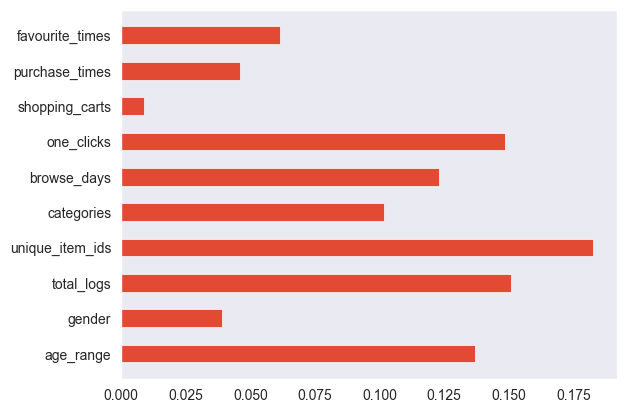

In [78]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=2) 
forest.fit(X_train, y_train)
Predict_proba = forest.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
plt.barh(X.columns.tolist(),height=0.5,width=forest.feature_importances_,align="center")

梯度提升回归树

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train)
Predict_proba = gbrt.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

[[0.87042249 0.12957751]
 [0.957535   0.042465  ]
 [0.9548853  0.0451147 ]
 ...
 [0.91902328 0.08097672]
 [0.96209947 0.03790053]
 [0.91587013 0.08412987]]
Accuracy on training set: 0.939
Accuracy on test set: 0.938


<BarContainer object of 10 artists>

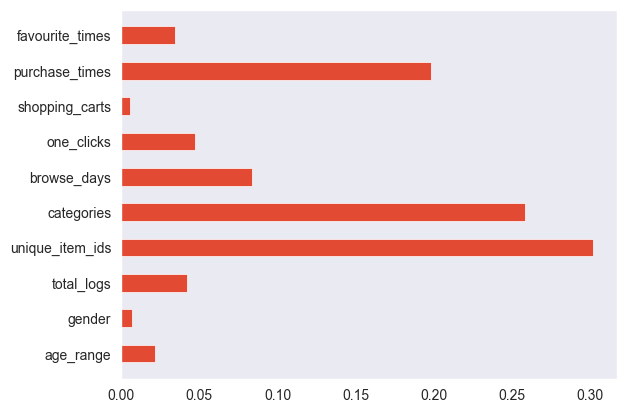

In [80]:
plt.barh(X.columns.tolist(),height=0.5,width=gbrt.feature_importances_,align="center")

多层感知机

c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[0.82646534 0.17353466]
 [0.94629485 0.05370515]
 [0.94564477 0.05435523]
 ...
 [0.93224405 0.06775595]
 [0.95557498 0.04442502]
 [0.89385809 0.10614191]]
0.9383586849852796
模型的评估报告：
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     61206
           1       0.19      0.00      0.00      4010

    accuracy                           0.94     65216
   macro avg       0.56      0.50      0.48     65216
weighted avg       0.89      0.94      0.91     65216



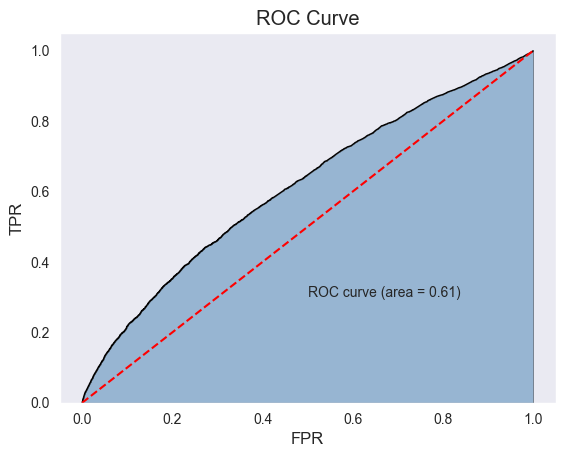

In [104]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=0.1,random_state=0,hidden_layer_sizes=[10,10]).fit(X_train, y_train)
Predict = mlp.predict(X_test)
Predict_proba = mlp.predict_proba(X_test)
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
print(Score)

gbm_pred = mlp.predict(X_test)
gbm_proba = mlp.predict_proba(X_test)
print('模型的评估报告：\n',classification_report(y_test, gbm_pred))
plot_roc(y_test, gbm_proba[:,1])



In [82]:
# 原始数据预处理之缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = X_train[X_train.columns.tolist()].astype(float)
X_test = X_test[X_test.columns.tolist()].astype(float)

scaler.fit(X_train)

# 变换数据
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp1 = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10]).fit(X_train_scaled, y_train)
Predict = mlp1.predict(X_test)
Score = accuracy_score(y_test, Predict)
print(Score)

0.9381440137389597


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [103]:
from sklearn import metrics
def plot_roc(y_test, y_score):
    fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr,tpr)
    plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
    plt.plot(fpr, tpr, color='black', lw = 1)
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
    plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.show()

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8,

c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

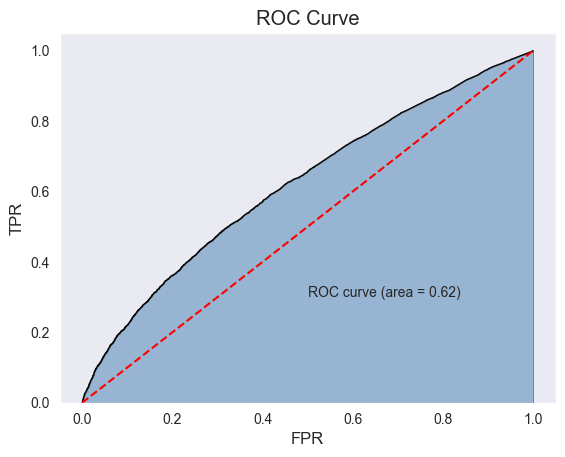

In [102]:
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.metrics import classification_report
params = {
        'verbose':0,
        'min_data_in_leaf': 4,
        'objective': 'binary',
        'metric': 'auc',
        'num_leaves': 32,
        'n_estimators':2000,
        #'max_bin': 50,
        'max_depth':5,
        "learning_rate": 0.01,
        "colsample_bytree": 0.8,  # 每次迭代中随机选择特征的比例
        "bagging_fraction": 0.8,  # 每次迭代时用的数据比例
        'n_jobs': -1,
        'silent': 1,  # 信息输出设置成1则没有信息输出
        'seed': 42,
        'bagging_freq':3,
        'is_unbalance':True,
        #'scale_pos_weight': wt
    }  #设置出参数



gbm = lgb.LGBMClassifier(**params)
gbm.fit(X_train, y_train, 
            eval_metric='auc',
    eval_set=[(X_train, y_train), (X_test, y_test)],
    callbacks = [early_stopping(stopping_rounds=30)]
        )
gbm_pred = gbm.predict(X_test)
gbm_proba = gbm.predict_proba(X_test)
print('模型的评估报告：\n',classification_report(y_test, gbm_pred))
plot_roc(y_test, gbm_proba[:,1])

测试集构建

In [83]:
df_test = pd.merge(df_test,user_info,on="user_id",how="left")
df_test = pd.merge(df_test,total_logs_temp,on=["user_id","merchant_id"],how="left")
df_test = pd.merge(df_test,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")
df_test = pd.merge(df_test,categories_temp1,on=["user_id","merchant_id"],how="left")
df_test = pd.merge(df_test,browse_days_temp1,on=["user_id","merchant_id"],how="left")
df_test = pd.merge(df_test,four_features,on=["user_id","merchant_id"],how="left")

df_test = df_test.fillna(method='bfill')
df_test = df_test.fillna(method='ffill')
# 缺失值向后填充

df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0


In [84]:
X1 = df_test.drop(['user_id','merchant_id','prob'],axis = 1)

In [88]:
Predict_proba = Logit.predict_proba(X1)
df_test["Logit_prob"] = Predict_proba[:,1]

In [89]:
Predict_proba = tree.predict_proba(X1)
df_test["Tree_prob"] = Predict_proba[:,1]


In [90]:
Predict_proba = gbrt.predict_proba(X1)
df_test["Gbrt_prob"] = Predict_proba[:,1]

In [85]:
Predict_proba = forest.predict_proba(X1)
df_test["Forest_prob"] = Predict_proba[:,1]
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,Forest_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0,0.032803
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0,0.000000
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0,0.010370
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0,0.000000
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2,0.100000
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1,0.000000
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0,0.000000
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,0.039958
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0,0.046536
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0,0.000000


In [91]:
Predict_proba = mlp.predict_proba(X1)
df_test["mlp_prob"] = Predict_proba[:,1]
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,Forest_prob,mlp_prob,Logit_prob,Tree_prob,Gbrt_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,0,1,0,0.032803,0.041846,0.045679,0.041629,0.036615
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,0,5,0,0.000000,0.096915,0.121231,0.102396,0.109463
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,0,1,0,0.010370,0.053295,0.054257,0.041629,0.043843
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,0,1,0,0.000000,0.054062,0.053202,0.041629,0.043843
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,0,1,2,0.100000,0.066271,0.058432,0.068542,0.076745
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,0,1,1,0.000000,0.048429,0.053664,0.047680,0.045435
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,0,2,0,0.000000,0.075139,0.058423,0.089106,0.074029
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,0.039958,0.044146,0.043567,0.041629,0.037901
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,0,1,0,0.046536,0.046868,0.043889,0.047680,0.043581
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,0,1,0,0.000000,0.058527,0.050510,0.068542,0.053930


In [92]:
choose = ["user_id","merchant_id","mlp_prob"]
res = df_test[choose]
res.rename(columns={"mlp_prob":"prob"},inplace=True)
print(res.head(10))
res.to_csv(path_or_buf = "prediction.csv",index = False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20464\2148454488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.rename(columns={"mlp_prob":"prob"},inplace=True)


   user_id  merchant_id      prob
0   163968         4605  0.041846
1   360576         1581  0.096915
2    98688         1964  0.053295
3    98688         3645  0.054062
4   295296         3361  0.066271
5    33408           98  0.048429
6   230016         1742  0.075139
7   164736          598  0.044146
8   164736         1963  0.046868
9   164736         2634  0.058527
